---
title: stata教程14-极端数据处理
date: 2019-01-10 17:17:55
tags: [stata]
toc: true
mathjax: true

---


<span></span>
<!-- more -->

OLS回归受极端值的影响很大, 如果数据集中存在极端值, 那么很容易导致回归曲线偏向极端值, 这就导致回归方程因为极端值而偏离真实的情况。

衡量一个case(一个样本)的影响力的指标是lev(leverage), 在stata中可以使用"predict lev, leverage"命令来实现。

还是以"nerlove.dta"数据集为例, 先导入数据:

In [1]:
use data/nerlove.dta, clear

(Nerlove 1963 paper)


做回归分析:

In [2]:
reg lntc lnq lnpl lnpk lnpf


      Source |       SS           df       MS      Number of obs   =       145
-------------+----------------------------------   F(4, 140)       =    437.90
       Model |  269.524728         4  67.3811819   Prob > F        =    0.0000
    Residual |  21.5420958       140  .153872113   R-squared       =    0.9260
-------------+----------------------------------   Adj R-squared   =    0.9239
       Total |  291.066823       144  2.02129738   Root MSE        =    .39227

------------------------------------------------------------------------------
        lntc |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
         lnq |   .7209135   .0174337    41.35   0.000     .6864462    .7553808
        lnpl |   .4559645    .299802     1.52   0.131    -.1367602    1.048689
        lnpk |  -.2151476   .3398295    -0.63   0.528    -.8870089    .4567136
        lnpf |   .4258137   .1003218     4.24   0.

计算每个样本的影响力, 存为变量"lev":

In [3]:
predict lev, leverage

描述变量lev的基本情况:

In [4]:
sum lev


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
         lev |        145    .0344828    .0202164    .009924   .1177335


我们指导lev越大, 样本的影响力越大, 所以看最大值为.1177, 计算它比均值的倍数:

In [6]:
dis r(max)/r(mean)

3.4142728


这个数据似乎还不是很大。

我们还可以对lev进行排序, 然后查看其中最大的几个数值:

In [7]:
gsort - lev

In [8]:
list lev in 1/5


     +----------+
     |      lev |
     |----------|
  1. | .1177335 |
  2. | .1001472 |
  3. | .0983759 |
  4. | .0775742 |
  5. | .0707152 |
     +----------+


我们还可以绘制出lev的散点图来找出极端值:

In [11]:
stem lev,  lines(2)


Stem-and-leaf plot for lev (Leverage)

lev rounded to nearest multiple of .001
plot in units of .001

   1* | 000122222333334444
   1. | 55555566666777777899
   2* | 00011111122222222222333344
   2. | 5556678999
   3* | 1122223334444
   3. | 567788999
   4* | 011234
   4. | 7888999
   5* | 0000011122334
   5. | 556789
   6* | 12224
   6. | 578899
   7* | 01
   7. | 8
   8* | 
   8. | 
   9* | 
   9. | 8
  10* | 0
  10. | 
  11* | 
  11. | 8


从上面的结果中, 如果把最下面的这个数当作异常值也是可以的, 或者最下面的三个, 但是你需要给出充足理由, 所以你需要做一些样本来源的调查, 如果确认他们为异常值, 你可以删除他们, 但是在论文中, 通常需要汇报删除前后的统计结果。

除了茎叶图, 还可以绘制直方图, 其解读方法和茎叶图一样, 这里不再赘述。

(bin=12, start=.00992401, width=.00898413)


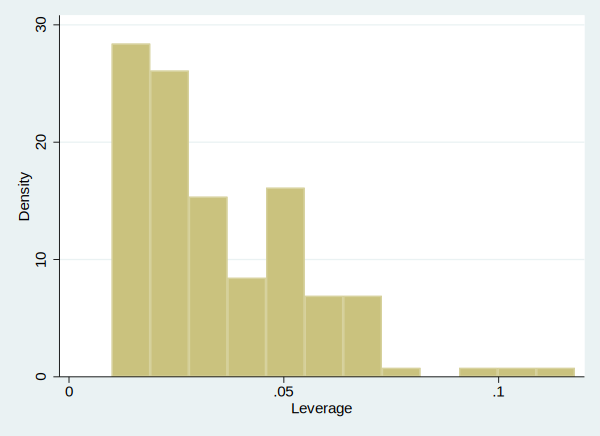

In [12]:
hist lev